In [6]:
import itertools
import linecache
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import scipy
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [7]:
imfFull = "#548235"
imfTest = "#99C979"

knnFull = "#C55A11"
knnTest = "#ff5811"
normalizedKnnFull = "#4A76C6"
normalizedKnnTest = "#19C3FF"

average = "#FFC000"
popularity = "#F18F8F"
random = "#BFBFBF"

CorrelationWithUnbiasedEvaluation = "#C00000"
ExpectedIntersectionRatioInTopN = "#FFC000"
RatioOfTies = "#3333FF"
RatioOfTiesAtZero = "#006600"

rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
    "Correlation with unbiased evaluation": CorrelationWithUnbiasedEvaluation,
    "Expected intersection ratio in top n": ExpectedIntersectionRatioInTopN,
    "Ratio of ties": RatioOfTies,
    "Ratio of ties at zero": RatioOfTiesAtZero,
    "Sum of p-values": "black",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
rec_colors = (
    imfFull,
    imfTest,
    knnFull,
    knnTest,
    normalizedKnnFull,
    normalizedKnnTest,
    average,
    popularity,
    random,
)

datasets = ["ml100k", "ml1m", "ml10m"]
class_splits = [""]  #, "-male", "-female", "-young", "-old"]
splits = []
for d in datasets:
    for c in class_splits:
        splits.append(d + c)

pp.pprint(splits)


def hide_spines(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

['ml100k', 'ml1m', 'ml10m']


In [8]:
data_dir = r"C:\Projects\RecSys2020\results\_mbd_popular\\"


def split_list(a_list):
    half = len(a_list) // 2
    return a_list[:half], a_list[half:]

figure1.popular.png

ml100k
ml1m
ml10m


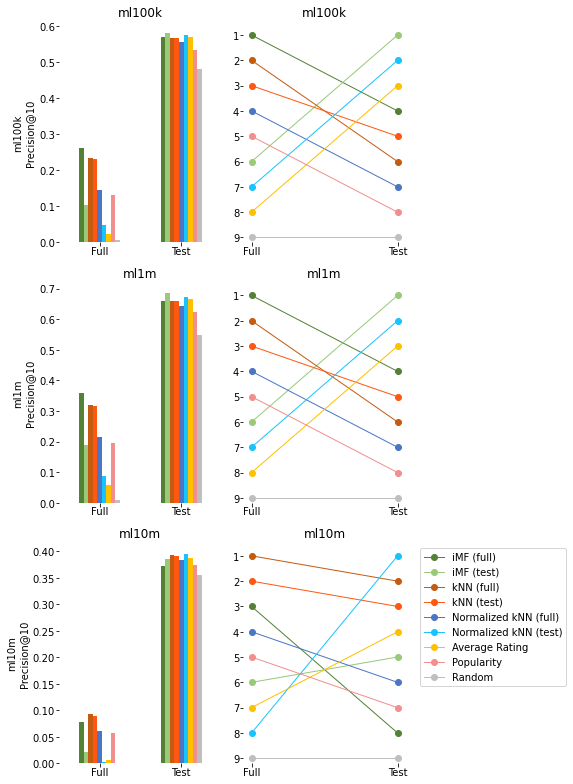

In [9]:
def plot_figure1(split, ax1, ax2):
    print(split)
    # ax1 = ax[i,j]
    ax1.set_title(split)

    # ax2 = ax[i,j+1]
    ax2.set_title(split)

    file = os.path.join(
        r"C:\Projects\RecSys2020\results", "figure101." + split + ".txt"
    )

    lines_with_metrics = [
        (i, linecache.getline(file, i + 1))
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]

    rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
    params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
    fig1 = pd.read_table(header=4, **params)

    plot_figure1_bars(ax1, fig1, split)
    artists = plot_figure1_ranks(ax2, fig1)

    return (artists, fig1.Recommender)


def plot_figure1_ranks(ax2, fig1):
    data = [
        list(a)
        for a in zip(
            fig1.Recommender,
            fig1.Full.rank(ascending=False),
            fig1.Test.rank(ascending=False),
        )
    ]
    artists = []
    for row, color in zip(data, rec_colors):
        artist = plt.Line2D(
            xdata=[1, 2], ydata=[row[1:]], lw=1, color=rec_colors_dict[row[0]], marker="o"
        )
        ax2.add_artist(artist)
        artists.append(artist)
    ax2.set_ybound([0.5, len(artists) + 0.2])
    ax2.set_xbound([0.94, 2.06])

    hide_spines(ax2)

    ax2.invert_yaxis()
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(["Full", "Test"])
    # ax2.set_ylabel("Sistemos reitingas")
    return artists


def plot_figure1_bars(ax, data, split):
    f1 = np.array(data)
    df = pd.DataFrame(index=["Full", "Test"])

    for i, r in enumerate(data.Recommender):
        df[r] = f1[i][1:]

    ax00 = df.plot(kind="bar", color=rec_colors, legend=None, ax=ax)
    ax00.set_ylabel(split + "\nPrecision@10")
    ax00.xaxis.set_tick_params(rotation=0)

    hide_spines(ax)


print("figure1.popular.png\n")
fig, ax = plt.subplots(3, 2)
# firstColumn, secondColumn = split_list(splits)

for i, split in enumerate(splits):
    ax1 = ax[i, 0]
    ax2 = ax[i, 1]
    artists, recommenders = plot_figure1(split, ax1, ax2)

# for i, split in enumerate(splits):
#     ax1 = ax[i, 2]
#     ax2 = ax[i, 3]
#     artists, recommenders = plot_figure1(split, ax1, ax2)

for idx, a in np.ndenumerate(ax):
    a.tick_params(axis="both", which="both", pad=0)

plt.legend(
    artists,
    recommenders,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    # title="Recommender",
    title_fontsize="xx-large",
)
a4_size = (11, 8)
a3_size = (16, 11)

fig.set_size_inches(tuple(reversed(a4_size)))
fig.tight_layout()

png = os.path.join(data_dir, "figure1.png")
fig.savefig(png, format="png", dpi=300, transparent=False)
plt.show()
# plt.close("all")

In [10]:
def rank(data):
    artists = []
    data.set_index("Target size")
    for i, j in data.groupby(["Target size"], axis=0):
        del j["Target size"]
        rank = j.rank(axis=1, ascending=False)
        artist = np.array(rank)[0]
        artists.append(artist)

    rank = []
    for i, t in enumerate(data.keys()[1:]):
        rank.append([t] + np.array(artists)[:, i].tolist())
    return rank



In [11]:
def plot_system_rankings(data, ax, xlabel=r"$|N_{u}|$", ylabel="", xticks=None):
    artists = []
    for row, color in zip(data, rec_colors):
        x = list(range(len(data[0]) - 1))
        artist = plt.Line2D(xdata=x, ydata=[row[1:]], lw=1, color=color, marker="o")
        ax.add_artist(artist)
        artists.append(artist)

    ax.set_ybound([0.8, 10])
    ax.set_xbound([-0.2, len(data) + 1])
    hide_spines(ax)
    ax.set_xticks(list(range(len(data[0]) - 1)))
    ax.set_xticklabels(list(itertools.chain(xticks[:-1], ["Full"])))
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    # plt.xticks(list(range(len(ndcg_rank[0])-1)), ndcg['Target size'].array)
    ax.set_yticks(list(range(1, len(data) + 1)))
    ax.invert_yaxis()
    ax.invert_xaxis()

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return artists


print("plot_metrics")


def plot_metrics(
        data, ax, xlabel=r"$|N_{u}|$", ylabel="", twinx=None, title=None, colors=None
):
    if colors is None:
        colors = rec_colors

    artists = []
    for column_title, color in zip(data.columns[1:], colors):
        x = list(range(len(data[column_title])))
        artist = plt.Line2D(
            xdata=x, ydata=[data[column_title]], lw=1, color=rec_colors_dict[column_title], marker="o"
        )
        ax.add_artist(artist)
        artists.append(artist)

    max = np.array((data.max()[1:])).max()

    ax.set_ybound([0, max + max * 0.1 + 0.0000001])
    ax.set_xbound([-0.1, len(ndcg) + 0.06])

    hide_spines(ax)
    ax.set_xticks(list(range(len(data["Target size"]))))
    ax.set_xticklabels(list(itertools.chain(data["Target size"].array[:-1], ["Full"])))
    ax.invert_xaxis()
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if twinx is not None and twinx.max() > 0:
        # print("twinx", twinx)
        label = "Sum of p-values"
        ax2 = ax.twinx()
        (e,) = ax2.plot(
            list(range(len(twinx))),
            twinx,
            label=label,
            lw=1,
            color="black",
            fillstyle="none",
            markeredgecolor="black",
            marker="s",
        )
        ax2.set_ylabel(label)
        max = twinx.max()
        ax2.set_ylim(0, max + 0.1 * max + 0.01)

        hide_spines(ax2)
        # ax2.legend(loc=1)
        # artists.append(ax2)
        artists.append(e)

    if title is not None:
        ax.set_title(title)

    if xlabel != "":
        ax.set_xlabel(xlabel)
    return artists, data.columns[1:]

plot_metrics


In [12]:
i = 0
data = {d: {} for d in splits}

for split in splits:

    file = os.path.join(
        r"C:\Projects\RecSys2020\results", "figure303." + split + ".txt"
    )
    print(file)
    lines_with_metrics = [
        (i, linecache.getline(file, i + 1).strip())
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]
    print(lines_with_metrics)
    rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
    params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)

    for j, metric in enumerate(lines_with_metrics):
        metric_name = metric[1]
        metric_line = metric[0]
        table = pd.read_table(header=metric_line - j, **params)
        data[split][metric_name] = table

    i = i + 2


# pp.pprint(data)


def split_metrics(d):
    # P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10'
    return d["P@10"], d["Recall@10"], d["nDCG@10"], d["FScore@10"]

#precision, recall, ndcg, fscore = split_metrics(data["ml1m"])

C:\Projects\RecSys2020\results\figure303.ml100k.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml1m.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml10m.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]


In [13]:
def get_figure_data(file_name):
    file = os.path.join(r"C:\Projects\RecSys2020\results", file_name)
    print(file)
    lines_with_metrics = [
        (i, linecache.getline(file, i + 1).strip())
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]
    # print('\t' + lines_with_metrics)
    rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
    params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
    data = dict()
    for j, metric in enumerate(lines_with_metrics):
        metric_name = metric[1]
        metric_line = metric[0]
        data[metric_name] = pd.read_table(header=metric_line - j, **params)
    return data

In [14]:
data["ml1m"].keys()

dict_keys(['P@10', 'Recall@10', 'nDCG@10', 'FScore@10'])

figure3

ml100k
C:\Projects\RecSys2020\results\figure303.ml100k.txt
ml1m
C:\Projects\RecSys2020\results\figure303.ml1m.txt
ml10m
C:\Projects\RecSys2020\results\figure303.ml10m.txt


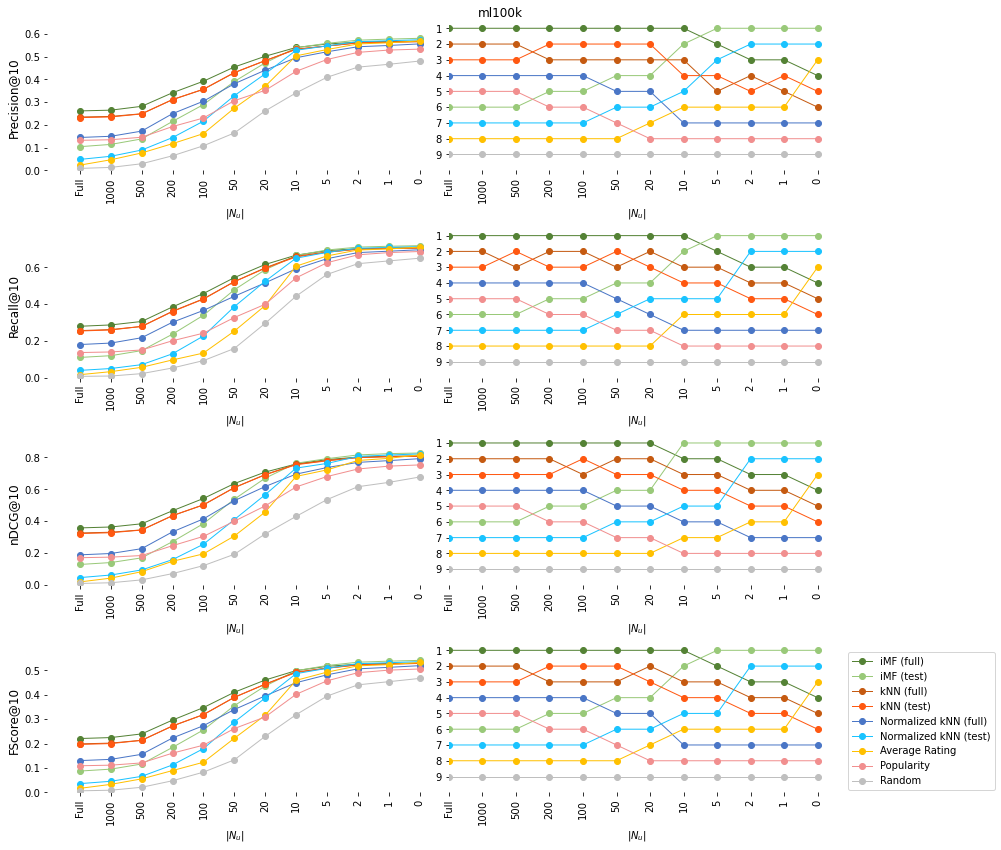

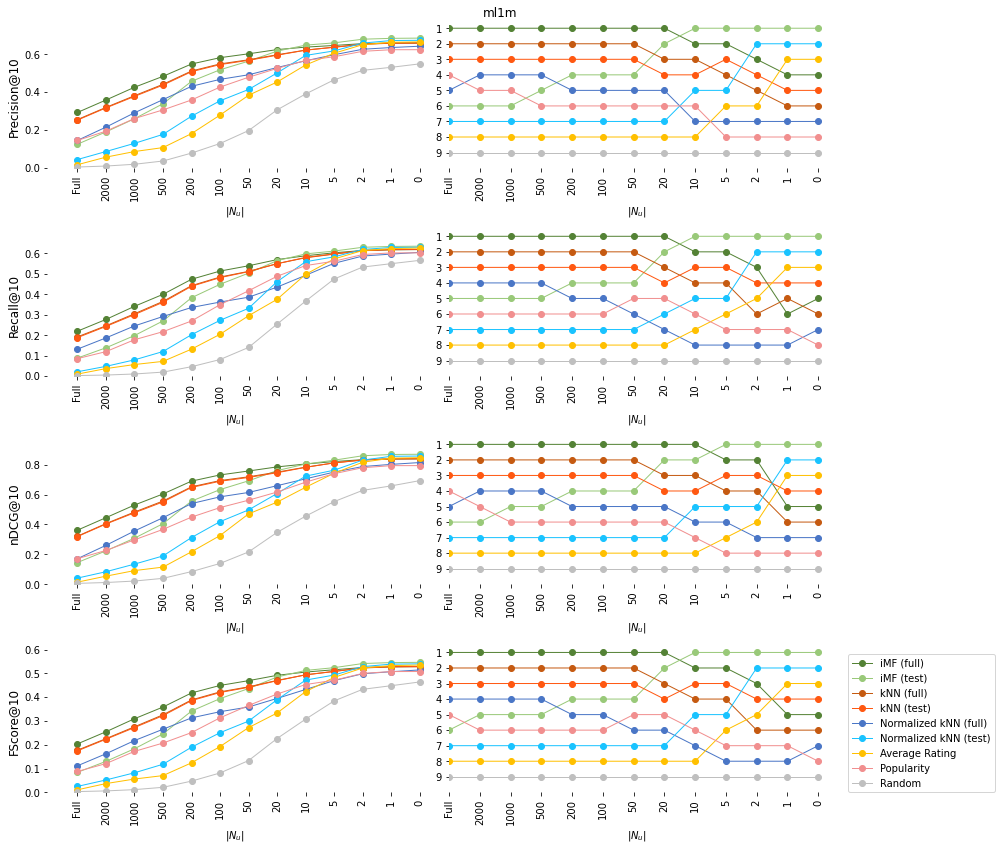

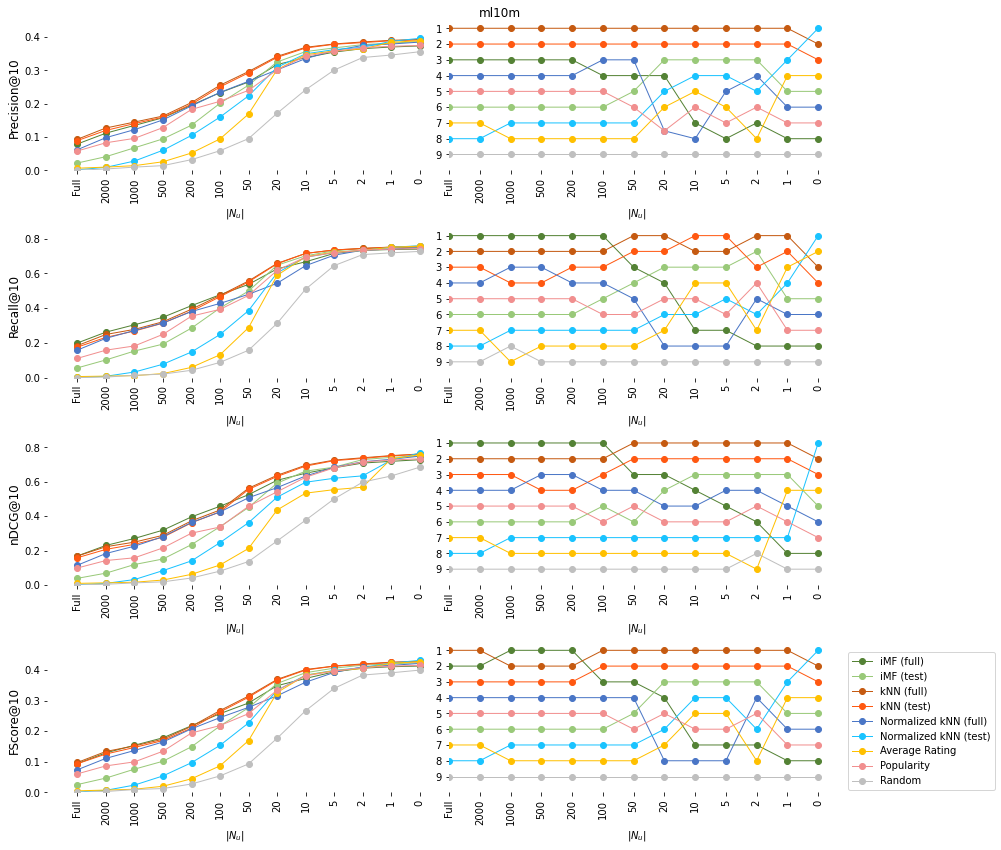

In [18]:
print("figure3\n")
for split in splits:
    print(split)
    data = get_figure_data("figure303." + split + ".txt")
    precision, recall, ndcg, fscore = split_metrics(data)

    ndcg_rank = rank(ndcg)
    precision_rank = rank(precision)
    recall_rank = rank(recall)
    fscore_rank = rank(fscore)

    cols = ["Column {}".format(col) for col in range(1, 2)]
    rows = [
        "Row {}".format(row)
        for row in ["Precision@10", "Recall@10", "nDCG@10", "FScore@10"]
    ]

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

    # for ax, col in zip(axes[0], cols):
    #    ax.set_title(col)
    #    #ax.set_xlabel('|Nu|')

    for ax, row in zip(axes[:, 0], rows):
        ax.set_ylabel(row, rotation=90, size="large")

    plot_metrics(precision, axes[0][0], ylabel="Precision@10")
    plot_metrics(recall, axes[1][0], ylabel="Recall@10")
    plot_metrics(ndcg, axes[2][0], ylabel="nDCG@10")
    artists, recommender = plot_metrics(fscore, axes[3][0], ylabel="FScore@10")

    plot_system_rankings(precision_rank, axes[0][1], xticks=ndcg["Target size"].array)
    plot_system_rankings(recall_rank, axes[1][1], xticks=ndcg["Target size"].array)
    plot_system_rankings(ndcg_rank, axes[2][1], xticks=ndcg["Target size"].array)
    plot_system_rankings(fscore_rank, axes[3][1], xticks=ndcg["Target size"].array)

    plt.legend(
        artists,
        recommender,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        # title="Recommender",
        title_fontsize="x-large",
    )
    fig.suptitle(split)

    fig.tight_layout()
    png = os.path.join(data_dir, "figure303." + split + ".png")
    fig.savefig(png, format="png", dpi=300, transparent=False)
    # dpi=1200
plt.show()
# plt.close("all")


In [16]:
def fill_correlation(p, r, n):
    p = p.drop(index=[10, 11])
    r = r.drop(index=[10, 11])
    n = n.drop(index=[10, 11])

    CorrelationnDCG = [
        0.642857143,
        0.714285714,
        0.785714286,
        0.857142857,
        0.857142857,
        0.857142857,
        0.928571429,
        0.857142857,
        0.857142857,
        0.785714286,
        0.714285714,
    ]
    CorrelationPreciion = [
        0.642857143,
        0.642857143,
        0.642857143,
        0.714285714,
        0.714285714,
        0.785714286,
        0.857142857,
        0.928571429,
        0.785714286,
        0.785714286,
        0.714285714,
    ]
    CorrelationRecall = [
        0.642857143,
        0.642857143,
        0.642857143,
        0.642857143,
        0.714285714,
        0.714285714,
        0.857142857,
        0.928571429,
        0.785714286,
        0.857142857,
        0.785714286,
    ]
    p["Correlation with unbiased evaluatio"] = CorrelationPreciion
    r["Correlation with unbiased evaluatio"] = CorrelationRecall
    n["Correlation with unbiased evaluatio"] = CorrelationnDCG

    def reoder_columns(d):
        cols = d.columns.tolist()
        cols = [cols[0]] + cols[-1:] + cols[1:-1]
        d = d[cols]
        return d

    p = reoder_columns(p)
    r = reoder_columns(r)
    n = reoder_columns(n)
    return (p, r, n)

In [32]:
print("def plot_figure4(...\n")


def plot_figure4(dataset, ax1, ax2, ax3, ax4, legend=True, yahoo=None):
    data = get_figure_data("figure4.txt." + dataset + ".txt")
    ndcg = data["nDCG@10"]
    precision = data["P@10"]
    recall = data["Recall@10"]
    fscore = data["FScore@10"]

    rows = ["Row {}".format(row) for row in ["Precision@10", "Recall@10", "nDCG@10", "FScore@10"]]

    for ax, row in zip([ax1, ax2, ax3, ax4], rows):
        ax.set_ylabel(row, rotation=90, size="large")

    twinx = "Sum of p-values"

    # precision, recall, ndcg = fill_correlation(precision, recall, ndcg)
    precision.head()
    plot_metrics(
        precision.iloc[:, :-1],
        ax1,
        ylabel="Precision@10",
        twinx=precision[twinx],
        xlabel="",
    )
    plot_metrics(
        recall.iloc[:, :-1],
        ax2,
        ylabel="Recall@10",
        twinx=recall[twinx],
        xlabel="",
    )
    plot_metrics(
        ndcg.iloc[:, :-1],
        ax3,
        ylabel="nDCG@10",
        twinx=ndcg[twinx],
    )
    artists, recommender = plot_metrics(
        fscore.iloc[:, :-1],
        ax4,
        ylabel="FScore@10",
        twinx=fscore[twinx],
    )

    if yahoo is not None:
        print("yahoo")
        ax1, ax2, ax3, ax4 = yahoo
        data = get_figure_data("figure4.txt.yahoo.txt")
        ndcg = data["nDCG@10"]
        precision = data["P@10"]
        recall = data["Recall@10"]
        fscore = data["FScore@10"]

        plot_metrics(
            precision.iloc[:, :-1],
            ax1,
            ylabel="Precision@10",
            twinx=precision[twinx],
            xlabel="",
        )
        plot_metrics(
            recall.iloc[:, :-1],
            ax2,
            ylabel="Recall@10",
            twinx=recall[twinx],
            xlabel="",
        )
        plot_metrics(
            ndcg.iloc[:, :-1],
            ax3,
            ylabel="nDCG@10",
            twinx=ndcg[twinx],
        )
        artists, recommender = plot_metrics(
            fscore.iloc[:, :-1],
            ax4,
            ylabel="FScore@10",
            twinx=fscore[twinx],
        )

    if legend == True:
        plt.legend(artists, recommender, bbox_to_anchor=(1.05, 1), loc="best")
        fig.suptitle(dataset)

    return artists, ndcg.columns[1:]

def plot_figure4(...



figure4.full

C:\Projects\RecSys2020\results\figure4.txt.ml1m.txt
yahoo
C:\Projects\RecSys2020\results\figure4.txt.yahoo.txt


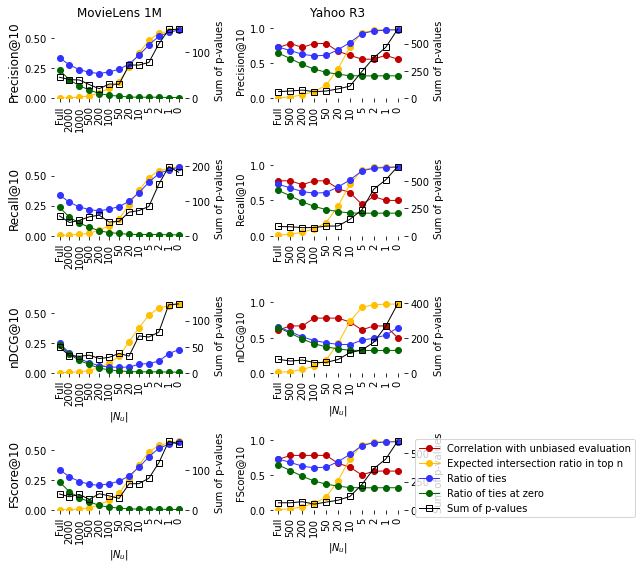

In [45]:
print("figure4.full\n")

fig, axes = plt.subplots(nrows=4, ncols=2)

artists, recommender = plot_figure4(
    "ml1m",
    axes[0, 0],
    axes[1, 0],
    axes[2, 0],
    axes[3, 0],
    legend=False,
    yahoo=(axes[0, 1], axes[1, 1], axes[2, 1], axes[3, 1]),
)

axes[0][0].set_title("MovieLens 1M")
axes[0][1].set_title("Yahoo R3")

# plt.legend(
#     artists,
#     recommender,
#     loc="upper center",
#     bbox_to_anchor=(0.2, -0.05),
#     fancybox=True,
#     shadow=True,
#     ncol=2,
# )
plt.legend(artists, recommender, bbox_to_anchor=(1.05, 1), loc="best")

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Put a legend below current axis
# plt.legend(
#    loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5
# )


fig.set_size_inches(9, 8)
# fig.tight_layout()
plt.tight_layout()

png = os.path.join(data_dir, "figure4.full.png")
fig.savefig(png, format="png", dpi=300, transparent=False)
# dpi=1200
plt.show()
# plt.close("all")

figure4

ml100k
C:\Projects\RecSys2020\results\figure4.txt.ml100k.txt
ml1m
C:\Projects\RecSys2020\results\figure4.txt.ml1m.txt
ml10m
C:\Projects\RecSys2020\results\figure4.txt.ml10m.txt


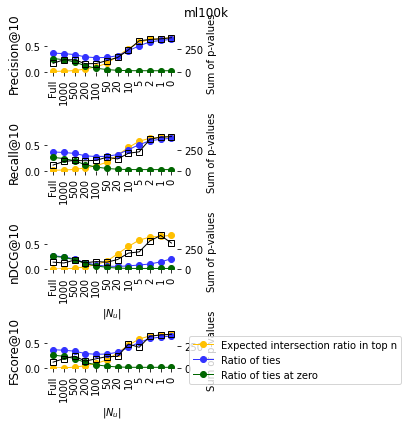

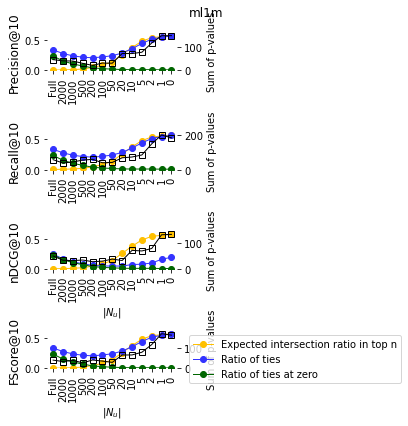

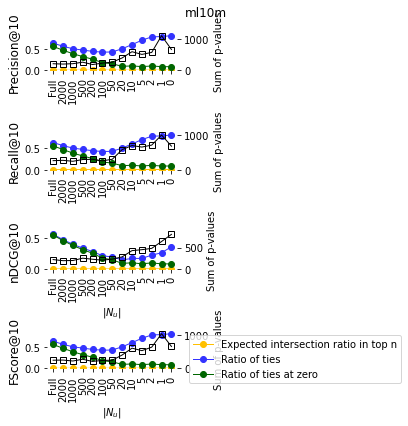

In [47]:
print("figure4\n")

for split in splits:
    print(split)

    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))
    artists = plot_figure4(split, axes[0], axes[1], axes[2], axes[3])
    png = os.path.join(data_dir, "figure4." + split + ".png")
    fig.set_size_inches(6, 6)
    fig.tight_layout()
    fig.savefig(png, format="png", dpi=300, transparent=False)
    # dpi=1200
plt.show()
# plt.close("all")

In [ ]:
print("figure4.cross-validation.png\n")
fig, ax = plt.subplots(9, len(splits) // 3)
firstColumn, secondColumn = split_list(splits)


def plot_column(i, split, ax, col):
    print(split, i * 3)
    i = i * 3
    ax1 = ax[0 + i, col]
    ax2 = ax[1 + i, col]
    ax3 = ax[2 + i, col]
    ax4 = ax[3 + i, col]
    artists, recommenders = plot_figure4(split, ax1, ax2, ax3, ax4, legend=False)
    ax1.set_title(split, fontdict={"size": 12, "weight": "bold"})
    return artists, recommenders


for i, split in enumerate(firstColumn):
    plot_column(i, split, ax, col=0)

for i, split in enumerate(secondColumn):
    artists, recommenders = plot_column(i, split, ax, col=1)

plt.legend(
    artists,
    recommenders,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title_fontsize="xx-large",
)
fig.set_size_inches(20, 20)
fig.tight_layout()

png = os.path.join(data_dir, "figure4.cross-validation.png")
fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

In [ ]:
print("figure5.cross-validation.png\n")
fig, axes = plt.subplots(nrows=len(splits), ncols=1, figsize=(8, 10))
for split, ax in zip(splits, axes):
    print(split)
    coverage = pd.read_table(
        r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
        sep="\t",
        header=4,
        nrows=13,
    )

    artists, recommenders = plot_metrics(
        coverage, ax, ylabel="Coverage@10", title=split
    )

plt.legend(
    artists,
    recommenders,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    # title="Recommender",
    title_fontsize="x-large",
)

png = os.path.join(data_dir, "figure5.cross-validation.png")
# fig.suptitle(split)
fig.set_size_inches(10, 20)
fig.tight_layout()
fig.savefig(png, format="png", dpi=300)
# dpi=1200
plt.show()
# plt.close("all")

figure5.cross-validation.b.png



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Projects\\RecSys2020\\results\\\\ml100k\\figure5.txt'

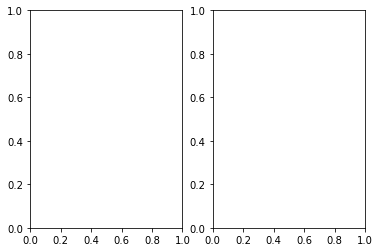

In [44]:
print("figure5.cross-validation.b.png\n")
fig, axs = plt.subplots(len(splits) // 2, 2)
firstColumn, secondColumn = split_list(splits)

for i, split in enumerate(firstColumn):
    coverage = pd.read_table(
        r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
        sep="\t",
        header=4,
        nrows=13,
    )
    print(split, i)
    ax = axs[i, 0]
    plot_metrics(coverage, ax, ylabel="Coverage@10", title=split)

for i, split in enumerate(secondColumn):
    coverage = pd.read_table(
        r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
        sep="\t",
        header=4,
        nrows=13,
    )
    print(split, i)
    ax = axs[i, 1]
    artists, recommender = plot_metrics(coverage, ax, ylabel="Coverage@10", title=split)

plt.legend(
    artists,
    recommender,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    # title="Recommender",
    title_fontsize="xx-large",
)
fig.set_size_inches(14, 8)
fig.tight_layout()
png = os.path.join(data_dir, "figure5.cross-validation.b.png")
fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

In [ ]:
print("figure5.full.png\n")
fig, (ax1, ax2) = plt.subplots(1, 2)
firstColumn, secondColumn = split_list(splits)
split = "ShuffleSplit"
coverage = pd.read_table(
    r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
    sep="\t",
    header=4,
    nrows=13,
)
plot_metrics(coverage, ax1, ylabel="Coverage@10", title="MovieLens1M")

coverage = pd.read_table(
    r"C:\Projects\RecSys2020\results\KFold\figure5.txt",
    sep="\t",
    header=4,
    nrows=11,
)
artists, recommender = plot_metrics(coverage, ax2, ylabel="Coverage@10", title="Yahoo!")

plt.legend(
    artists,
    recommender,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    # title="Recommender",
    title_fontsize="xx-large",
)
fig.set_size_inches(8, 3)
fig.tight_layout()
png = os.path.join(data_dir, "figure5.full.png")
fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

In [45]:
plt.close("all")
plt.show()